ApiKey: H230wyVUCGlJ3WBKjSBP2h8R0
ApiKeySecret: Jx5lUlaSXOrHjgxhaOVyBGGmgQlVyO2RodN7sEa0sgc2rf6KS4
AccessToken: 2609023950-SoDYyfl5TlbHDVGGvkH8MrjhiwrmBjbYevKVycH
AccessTokenSecret: UiPwDvLTkbz0UEeje1LZ4J06dN8M4vkLyeqbpCEBvGNFi

In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt

In [2]:
# Importing the keys
consumer_key = "H230wyVUCGlJ3WBKjSBP2h8R0"
consumer_secret = "Jx5lUlaSXOrHjgxhaOVyBGGmgQlVyO2RodN7sEa0sgc2rf6KS4"
access_token = "2609023950-SoDYyfl5TlbHDVGGvkH8MrjhiwrmBjbYevKVycH"
access_token_secret = "UiPwDvLTkbz0UEeje1LZ4J06dN8M4vkLyeqbpCEBvGNFi"

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [4]:
api = tweepy.API(auth)

In [5]:
search_term = input("Enter Keyword/Tag to search about: ")
no_of_tweets = int(input("Enter how many tweets to search: "))

Enter Keyword/Tag to search about: Money Heist
Enter how many tweets to search: 1000


In [10]:
tweets = tweepy.Cursor(api.search_tweets, q=search_term).items(no_of_tweets)


In [11]:
print(tweets)

In [12]:
a = TextBlob("I am a bad Cricket player")
a.sentiment.polarity

-0.6999999999999998

In [13]:
b = TextBlob("I am a good Cricket player")
b.sentiment.polarity

0.7

In [14]:
c = TextBlob("I am a Cricket player")
c.sentiment.polarity

0.0

In [15]:
positive = 0
negative = 0
neutral = 0
polarity = 0

In [ ]:
# Iterate with for loop

for tweet in tweets:
   analysis = TextBlob(tweet.text) # 'tweet.text' number of tweets that we are searching for
   polarity += analysis.sentiment.polarity

   if(analysis.sentiment.polarity == 0):
       neutral += 1

   elif(analysis.sentiment.polarity < 0.00):
       negative += 1

   elif(analysis.sentiment.polarity > 0.00):
       positive += 1

In [ ]:
def percentage(part, whole):
    return 100 * float(part)/float(whole)

In [ ]:
percentage(5,20)

In [ ]:
positive = percentage(positive, no_of_tweets)
negative = percentage(negative, no_of_tweets)
neutral  = percentage(neutral, no_of_tweets)
polarity  = percentage(polarity, no_of_tweets)

In [ ]:
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [ ]:
print("Reaction of the people on " + search_term +
      " By analyzing " + str(no_of_tweets) + " Tweets ")

if (polarity == 0):
    print(" is 'Neutral'")

elif (polarity < 0.00):
    print("is 'Negative'")

elif (polarity > 0.00):
    print("is 'Positive'")

In [ ]:
labels = ['Positive ['+str(positive)+'%]',
          'Neutral ['+str(neutral)+'%]',
          'Negative ['+str(negative)+'%]']

sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']

patches, texts = plt.pie(sizes, colors = colors, startangle = 90)
plt.legend(patches, labels, loc = "best")
plt.title('Reaction of the people on '
          + search_term +' by analyzing '
          + str(no_of_tweets) +' Tweets is:')
plt.axis('equal')
plt.tight_layout()
plt.show()

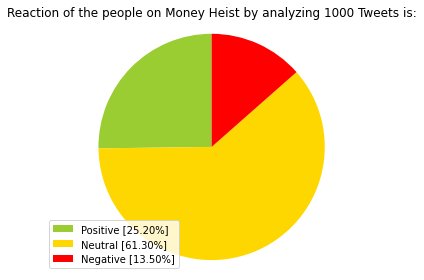